In [1]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('cleaned_filename.csv')

In [2]:
# defining X,y dataframe
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
# scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
import numpy as np
# Define the range of components to test
n_components = np.arange(1, X_train.shape[1]+1)

In [5]:
# Initialize variables to store results
best_n_components = 0
best_score = 0

In [7]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Loop over the range of components
for n in n_components:
    # Initialize PCA
    pca = PCA(n_components=n)

    # Fit and transform the data using PCA
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a KNN classifier on the transformed data
    model = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=2)
    model.fit(X_train_pca, y_train)

    # Evaluate the accuracy on the test set
    score = accuracy_score(y_test,model.predict(X_test_pca))

    # Update best number of components and best score if needed
    if score > best_score:
        best_n_components = n
        best_score = score

In [8]:
# Print the best number of components and corresponding accuracy
print(f"Best number of components: {best_n_components}")
print(f"Accuracy with {best_n_components} components: {best_score:.3f}")

Best number of components: 28
Accuracy with 28 components: 0.897


# evaluation

## training the model using 28 components

In [9]:
# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.35203068,  0.3687239 ,  0.40452578, ..., -0.00815397,
         0.24482253,  1.19099523],
       [-0.14796835, -0.24776187,  0.81174673, ...,  0.13384834,
         2.16884257,  3.18079631],
       [-0.34796797, -0.24776187, -0.56504793, ..., -0.05572942,
        -0.06081607, -0.16194019],
       ...,
       [ 0.6520301 , -0.24776187,  0.01669629, ..., -0.12007846,
        -0.23117201, -0.27993815],
       [ 2.85202586, -0.24776187, -0.56504793, ..., -0.12783172,
        -0.23618248, -0.34459456],
       [-0.34796797, -0.24776187,  0.69539789, ..., -0.12472438,
        -0.23618248, -0.40601815]])

In [10]:
pca = PCA(n_components=28)
X_pca = pca.fit_transform(X)

In [11]:
# to check the ratio of useful information from each component
pca.explained_variance_ratio_

array([9.25462124e-01, 7.25628565e-02, 1.91461108e-03, 1.02871745e-05,
       7.15868722e-06, 5.96776876e-06, 4.31590230e-06, 3.07452868e-06,
       2.73159273e-06, 2.46162939e-06, 2.11290984e-06, 1.90628011e-06,
       1.72724148e-06, 1.64303085e-06, 1.50734637e-06, 1.34003923e-06,
       1.16686701e-06, 1.03368789e-06, 1.01243379e-06, 9.52722611e-07,
       7.57510202e-07, 7.25190982e-07, 6.35858758e-07, 5.75864182e-07,
       5.33519514e-07, 4.76472476e-07, 4.57450656e-07, 4.30910076e-07])

In [12]:
# train test split
X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [13]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=2)

In [14]:
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.8562945368171021

## confusion matrix

In [16]:
y_predicted = model.predict(X_test_pca)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

Text(60.222222222222214, 0.5, 'Truth')

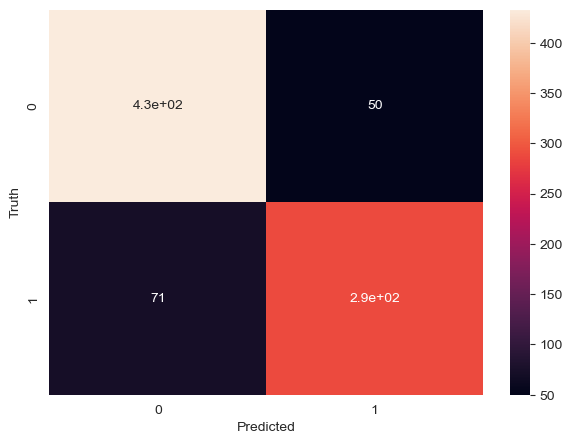

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## classification report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       483
           1       0.85      0.80      0.83       359

    accuracy                           0.86       842
   macro avg       0.86      0.85      0.85       842
weighted avg       0.86      0.86      0.86       842



## ROC curve

In [20]:
# predict probabilities on test set
y_pred_prob = model.predict_proba(X_test_pca)[:, 1]

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

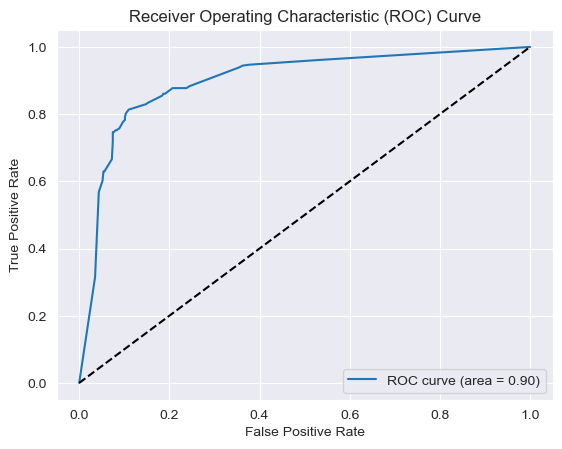

In [22]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()